In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read in full toxicity dataset
#data = pd.read_csv('toxicity_data_13.csv')
data = pd.read_csv('data.csv')
print(data.columns)
features = data.columns

# Convert 'Class' column to numerical values
data['Class'] = data['Class'].map({'NonToxic': 0, 'Toxic': 1})

#Output dimensions of the data
print("Dimensions of toxicity data:")
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])


Index(['MATS3v', 'nHBint10', 'MATS3s', 'MATS3p', 'nHBDon_Lipinski',
       'minHBint8', 'MATS3e', 'MATS3c', 'minHBint2', 'MATS3m',
       ...
       'WTPT-4', 'WTPT-5', 'ETA_EtaP_L', 'ETA_EtaP_F', 'ETA_EtaP_B', 'nT5Ring',
       'SHdNH', 'ETA_dEpsilon_C', 'MDEO-22', 'Class'],
      dtype='object', length=1204)
Dimensions of toxicity data:
Number of rows: 171
Number of columns: 1204


In [23]:
print(data)

     MATS3v  nHBint10  MATS3s  MATS3p  nHBDon_Lipinski  minHBint8  MATS3e  \
0    0.0908         0  0.0075  0.0173                0     0.0000 -0.0436   
1    0.0213         0  0.1144 -0.0410                0     0.0000  0.1231   
2    0.0018         0 -0.0156 -0.0765                2     0.0000 -0.1138   
3   -0.0251         0 -0.0064 -0.0894                3     0.0000 -0.0747   
4    0.0135         0  0.0424 -0.0353                0     0.0000 -0.0638   
..      ...       ...     ...     ...              ...        ...     ...   
166 -0.0960         0 -0.0478 -0.0840                2     0.0000 -0.0739   
167 -0.0064         1 -0.1222  0.0013                1     0.0000 -0.1873   
168  0.0096         2 -0.1846  0.0058                1     0.0000 -0.1293   
169 -0.0736         2 -0.1267 -0.0345                2     0.5346 -0.0361   
170 -0.1864         0 -0.0020 -0.1968                1     8.1414 -0.0529   

     MATS3c  minHBint2  MATS3m  ...   WTPT-4   WTPT-5  ETA_EtaP_L  ETA_EtaP

In [9]:
# Load the dataset
X = data.drop(columns=['Class'])
y = data['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Use RFE to select the top 13 features
rfe = RFE(model, n_features_to_select=13)
rfe.fit(X_scaled, y)

# Print the selected features
print(rfe.support_)

[False False False ... False False False]


In [3]:
# Count the number of True values and get their indices
num_true = np.sum(rfe.support_)
true_indices = np.where(rfe.support_)[0]

# Print the results
print("Number of True values:", num_true)
print("Indices of True values:", true_indices)

Number of True values: 13
Indices of True values: [ 160  334  355  451  468  646  776  864  893  897  946 1025 1136]


In [4]:
# Get the names of selected features
selected_features = X.columns[true_indices]

# Print the names of selected features
print("Names of selected features:")
print(selected_features)

#NCBI Selected 13
#MDEC23
#MATS2v
#ATSC8s
#VE3Dt
#CrippenMR
#SpMax7_Bhe 
#SpMin1_Bhs 
#C1SP2
#GATS8e
#GATS8s
#SpMax5_Bhv
#VE3_Dzi
#VPC-4

Names of selected features:
Index(['SpMax4_Bhm', 'MATS7v', 'maxssNH', 'MATS6s', 'ATSC2e', 'minsF',
       'MDEN-22', 'VR1_Dt', 'ATSC5e', 'ATSC5m', 'AATSC6e', 'SsF',
       'SpMax5_Bhm'],
      dtype='object')


Accuracy: 0.6857142857142857
Precision: 0.5
Recall: 0.18181818181818182
F1 Score: 0.26666666666666666


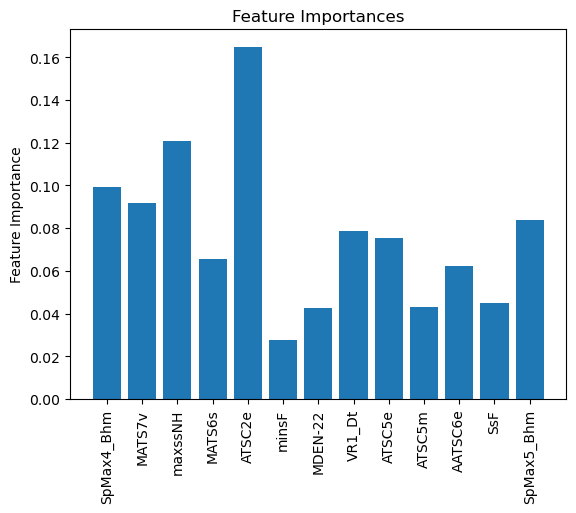

In [16]:
# conduct gradient boosting using sklearn.ensemble import GradientBoostingClassifier for the selected features
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
X = data[selected_features]
y = data['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# gradient boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot the feature importances
feature_importances = gb_classifier.feature_importances_
plt.bar(selected_features, feature_importances)
plt.xticks(rotation=90)
plt.ylabel("Feature Importance")
plt.title("Feature Importances")
plt.show()

